# Prophage figures 
***

## Prophages and their genome
To be done on the server

In [ ]:
import os
import pandas as pd

path_predic = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/prophage_decipher/phageboost/phageboost_70"
path_store = "/home/conchae/prediction_depolymerase_tropism/prophage_prediction/prophage_decipher/phageboost/phageboost_info"
path_kleborate = "/home/conchae/prediction_depolymerase_tropism/kleborate_results_all.tsv"

strain_ktype = pd.read_csv(f"{path_kleborate}", sep="\t") 

    # Writting the file, corresponding to the df
with open(f"{path_store}/prophage_genome_info.tsv","w") as outfile :
    for rep in os.listdir(path_predic):
        for strain in os.listdir(f"{path_predic}/{rep}"):
            for file in os.listdir(f"{path_predic}/{rep}/{strain}") :
                if file[-5:]== "fasta" :
                    path_fasta = f"{path_predic}/{rep}/{strain}/{file}"
                    length = len(open(path_fasta).read().split("\n")[1])
                    #df_line = strain_ktype[strain_ktype["Accession"]== strain]
                    outfile.write(f"{file.split('.fasta')[0]}\t{length}\n")
                    #outfile.write(f"{df_line['Specie']}\t{file.split('.fasta')[0]}\t{length}\n")

    # Moving the file from the server to local :
rsync -avzhe ssh conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/prophage_decipher/phageboost/phageboost_info/prophage_genome_info.tsv  /media/concha-eloko/Linux/prediction_depolymerase_tropism/prophage_work/prophage_prediction
rsync -avzhe ssh conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/kleborate_results_all.tsv  /media/concha-eloko/Linux/prediction_depolymerase_tropism/


In [20]:
import os
import pandas as pd

path_prophage = "/media/concha-eloko/Linux/prediction_depolymerase_tropism/prophage_work/prophage_prediction"

df_size = pd.read_csv(f"{path_prophage}/prophage_genome_info.tsv", sep="\t", names = ["prophage_name","size"])
df_size


,prophage_name,size
0,GCF_016651625.1__ADNPOLNF_29,7456
1,GCF_004313505.1__OKBDFILG_35,30750
2,GCF_004313505.1__OKBDFILG_3,30750
3,GCF_004831255.1__MBEDOODC_40,11948
4,GCF_004831255.1__MBEDOODC_30,22292
...,...,...
62444,GCF_006151965.1__GAKBGONK_165,21095
62445,GCF_006151965.1__GAKBGONK_127,21600
62446,GCF_006151965.1__GAKBGONK_104,13682
62447,GCF_001068035.1__AIADEGGG_527,24199


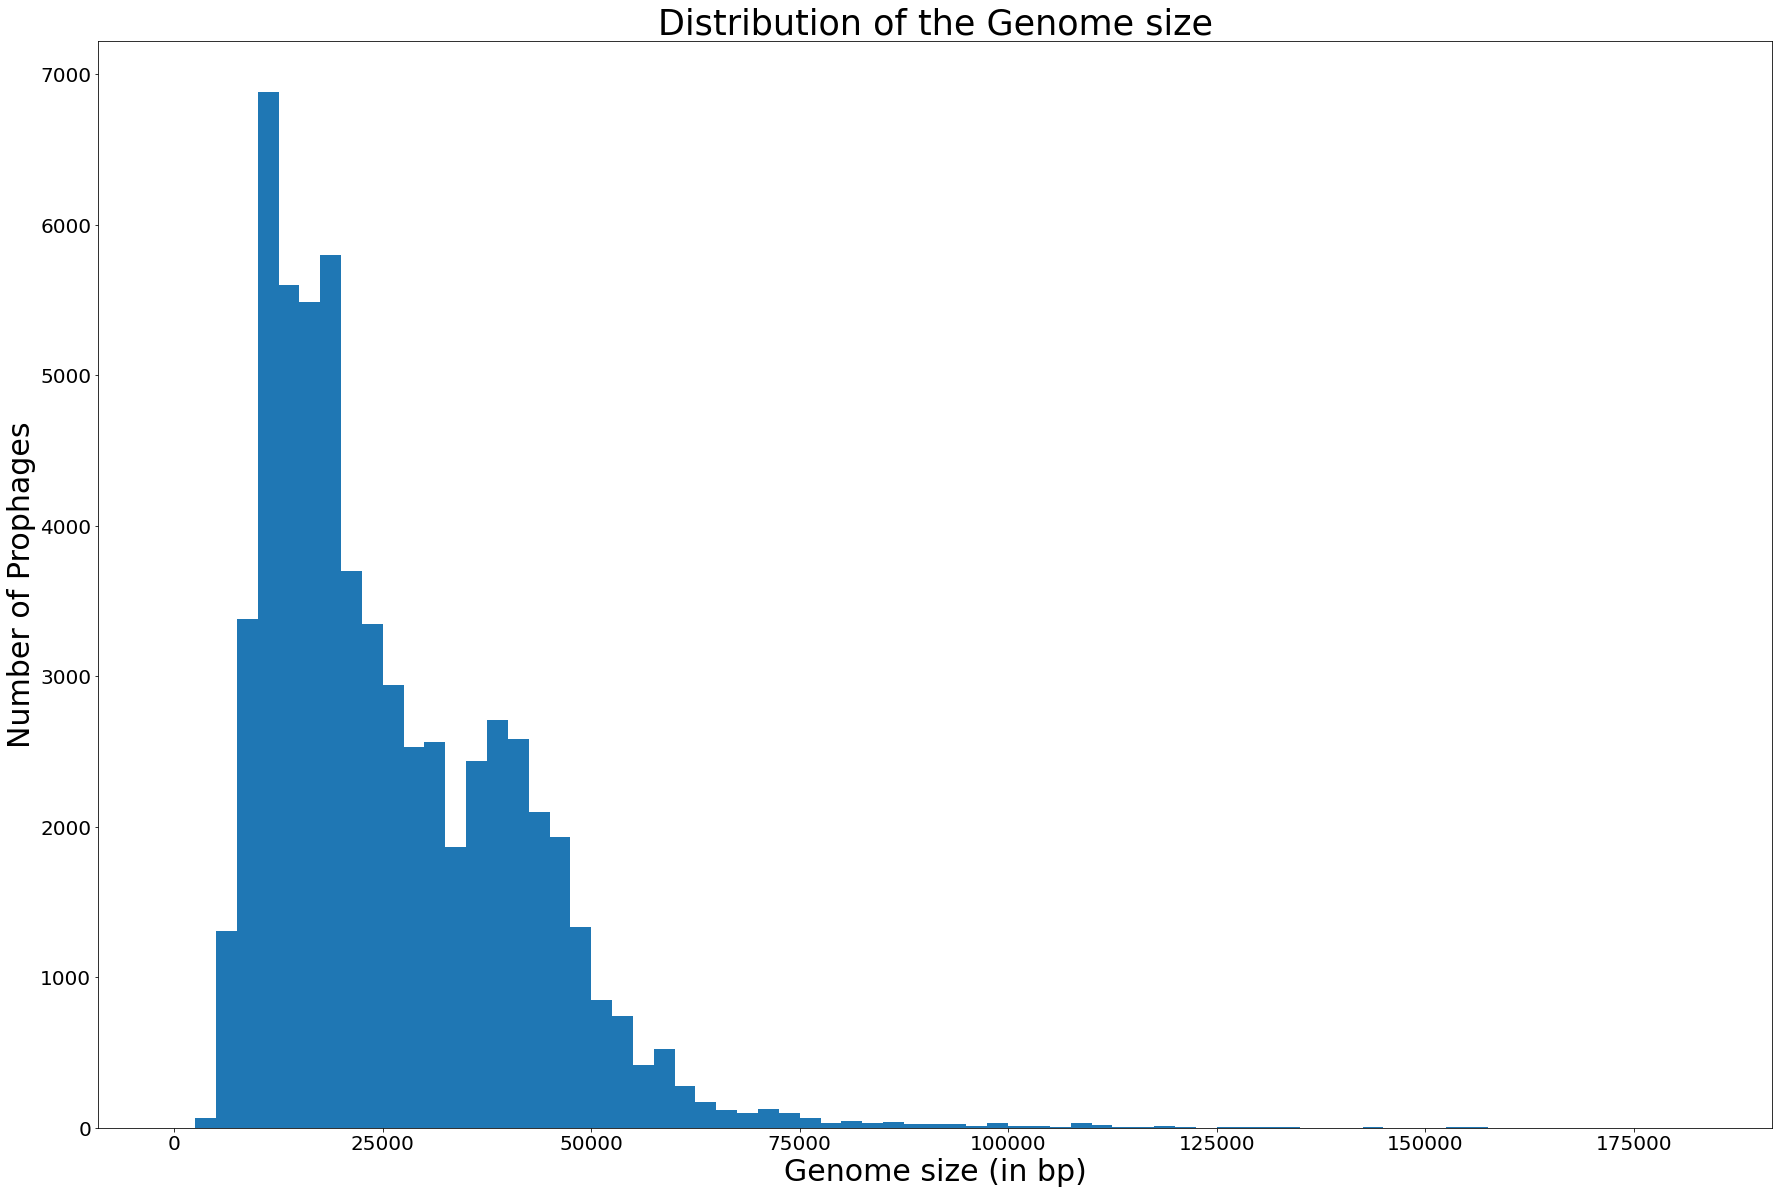

In [29]:
    # Plotting the distribution of the genome size
import matplotlib.pyplot as plt
occurences_size=df_size["size"]
bins=[num for num in range(0,184523,2500)]

plt.figure(figsize=(30,20))
plt.xlabel("Genome size (in bp)", size=30)
plt.ylabel("Number of Prophages", size=30)
plt.title("Distribution of the Genome size", size=35)
plt.hist(occurences_size, bins, histtype="bar",)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig(f"{path_prophage}/distribution_genome_size.phageboost.png",dpi='figure',format='png',)


***
## Prophages and the CLT

In [45]:
import os
import pandas as pd

    # Moving the file from the server to local
# rsync -avzhe ssh conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/kleborate_results_all.tsv  /media/concha-eloko/Linux/prediction_depolymerase_tropism/

path_prophage = "/media/concha-eloko/Linux/prediction_depolymerase_tropism/prophage_work/prophage_prediction"
path_ktype="/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/Panacota_info"

f_labels=["Prophage name","K-serotype monophyletic group","Id monophyletic group","Number of clades","Number of leafs","Number of new ancestors","Number of k-type swap","Nodes k-types","Nodes k-types all"]
df_prophages = pd.read_csv(f"{path_prophage}/prophage_data.clusters_80.phageboost_70.final.tsv", sep="\t", names =f_labels) 


df_prophages

,Prophage name,K-serotype monophyletic group,Id monophyletic group,Number of clades,Number of leafs,Number of new ancestors,Number of k-type swap,Nodes k-types,Nodes k-types all
0,GCF_020615655.1__EMCPJNLC_9,KL64,n4043,1,2,1,0,None,None
1,GCF_021213885.1__GOKIIELC_105,KL19,n28462846,4,5,4,0,KL19,"KL19,KL19,KL19,KL19"
2,GCF_003666725.1__MDOIKHEP_22,KL64,n2838,1,2,1,0,None,None
3,GCF_002261745.1__NCJKIGBL_29,KL47,n23482348,2,3,2,0,KL47,"KL47,KL47"
4,GCF_003262135.1__LHIFPDKB_94,KL64,n26072607,3,4,3,0,KL64,"KL64,KL64,KL64"
...,...,...,...,...,...,...,...,...,...
60064,GCF_900516735.1__KGBILJNM_66,KL54,GCF_900516735.1,0,1,0,0,None,None
60065,GCF_020479585.1__CKJNGDMH_2,KL49,n54935493,1,2,1,0,None,None
60066,GCF_900510465.1__KNLMOLHD_60,KL14,n4610,2,3,1,0,None,None
60067,GCF_902162525.1__BAKPCPAK_6,KL164,GCF_902162525.1,0,1,0,0,None,None


In [34]:
strain_ktype = pd.read_csv(f"{path_ktype}/results_kleborate_count.tsv", sep="\t") 
strain_ktype["K-Serotype"]

number = [int(item.split("KL")[1]) for item in strain_ktype["K-Serotype"]]
number.sort()
number[-1]

170

In [51]:
# With the LCA information :
dico_prophage = {}
for index_, prophage in df_prophages.iterrows() :
    CLT = df_prophages[df_prophages["Prophage name"].str.strip()== prophage["Prophage name"]]["K-serotype monophyletic group"].values[0]
    if CLT.count("|")==0 :
        if CLT not in dico_prophage :
            dico_prophage[CLT]=1
        else :
            dico_prophage[CLT]=dico_prophage[CLT]+1

In [59]:
dico_prophage
m=0
for clt in dico_prophage :
    m=m+dico_prophage[clt]
    
m

57344

In [60]:
57344/60068*100

95.46513950855697

In [22]:
# With the K_type information :
'''dico_prophage = {}
for index_, prophage in df_prophages.iterrows() :
    CLT = strain_ktype[strain_ktype["Accession"].str.strip()== prophage["Prophage name"].split("__")[0]]["K-Serotype"].values[0]
    if CLT not in dico_prophage :
        dico_prophage[CLT]=1
    else :
        dico_prophage[CLT]=dico_prophage[CLT]+1'''


KeyboardInterrupt: 

In [53]:
with open(f"{path_prophage}/CLT_LCA.effectif.phageboost_70.final.tsv","w") as outfile :
    for CLT in dico_prophage :
        outfile.write(f"{CLT},{dico_prophage[CLT]}\n")

In [2]:
dico_prophage = {' KL64 ': 8097,
 ' KL19 ': 535,
 ' KL47 ': 2980,
 ' KL25 ': 1020,
 ' KL39 ': 455,
 ' KL14 ': 554,
 ' KL28 ': 527,
 ' KL105 ': 1041,
 ' KL15 ': 1605,
 ' KL24 ': 2851,
 ' KL113 ': 55,
 ' KL111 ': 208,
 ' KL109 ': 75,
 ' KL81 ': 180,
 ' KL21 ': 539,
 ' KL10 ': 1039,
 ' KL27 ': 904,
 ' KL23 ': 473,
 ' KL2 ': 2653,
 ' KL108 ': 241,
 ' KL74 ': 180,
 ' KL36 ': 666,
 ' KL55 ': 161,
 ' KL136 ': 255,
 ' KL106 ': 3791,
 ' KL38 ': 455,
 ' KL13 ': 270,
 ' KL164 ': 16,
 ' KL107 ': 9485,
 ' KL62 ': 782,
 ' KL52 ': 175,
 ' KL125 ': 255,
 ' KL151 ': 447,
 ' KL137 ': 89,
 ' KL158 ': 147,
 ' KL46 ': 192,
 ' KL150 ': 45,
 ' KL103 ': 113,
 ' KL110 ': 324,
 ' KL155 ': 75,
 ' KL163 ': 44,
 ' KL20 ': 332,
 ' KL123 ': 159,
 ' KL51 ': 2831,
 ' KL63 ': 191,
 ' KL102 ': 1374,
 ' KL1 ': 590,
 ' KL45 ': 345,
 ' KL112 ': 520,
 ' KL17 ': 2902,
 ' KL30 ': 750,
 ' KL127 ': 101,
 ' KL42 ': 48,
 ' KL57 ': 231,
 ' KL12 ': 97,
 ' KL7 ': 192,
 ' KL118 ': 70,
 ' KL149 ': 356,
 ' KL157 ': 67,
 ' KL132 ': 42,
 ' KL58 ': 65,
 ' KL126 ': 51,
 ' KL22 ': 196,
 ' KL9 ': 86,
 ' KL53 ': 110,
 ' KL114 ': 220,
 ' KL145 ': 52,
 ' KL169 ': 79,
 ' KL3 ': 506,
 ' KL115 ': 19,
 ' KL154 ': 21,
 ' KL82 ': 32,
 ' KL16 ': 300,
 ' KL153 ': 40,
 ' KL43 ': 160,
 ' KL18 ': 69,
 ' KL159 ': 35,
 ' KL60 ': 220,
 ' KL146 ': 37,
 ' KL139 ': 36,
 ' KL122 ': 229,
 ' KL48 ': 162,
 ' KL54 ': 160,
 ' KL128 ': 42,
 ' KL166 ': 51,
 ' KL66 ': 14,
 ' KL124 ': 79,
 ' KL56 ': 26,
 ' KL31 ': 105,
 ' KL116 ': 59,
 ' KL35 ': 277,
 ' KL140 ': 69,
 ' KL34 ': 45,
 ' KL117 ': 69,
 ' KL61 ': 271,
 ' KL134 ': 27,
 ' KL59 ': 1,
 ' KL8 ': 101,
 ' KL71 ': 65,
 ' KL141 ': 42,
 ' KL162 ': 12,
 ' KL143 ': 14,
 ' KL104 ': 21,
 ' KL5 ': 48,
 ' KL142 ': 72,
 ' KL121 ': 11,
 ' KL11 ': 20,
 ' KL41 ': 12,
 ' KL131 ': 25,
 ' KL130 ': 2,
 ' KL40 ': 16,
 ' KL50 ': 8,
 ' KL119 ': 16,
 ' KL148 ': 2,
 ' KL144 ': 6,
 ' KL37 ': 21,
 ' KL6 ': 21,
 ' KL67 ': 15,
 ' KL70 ': 70,
 ' KL152 ': 19,
 ' KL29 ': 24,
 ' KL101 ': 7,
 ' KL49 ': 9,
 ' KL26 ': 74,
 ' KL147 ': 8,
 ' KL4 ': 19,
 ' KL133 ': 3,
 ' KL120 ': 11,
 ' KL138 ': 13,
 ' KL170 ': 38,
 ' KL165 ': 4,
 ' KL33 ': 2,
 ' KL80 ': 1}

In [57]:
clt_eff_0 = pd.read_csv(f"{path_prophage}/CLT.effectif.phageboost_70.final.tsv", sep =",", names = ["CLT","effec"])
clt_eff = pd.read_csv(f"{path_prophage}/CLT_LCA.effectif.phageboost_70.final.tsv", sep =",", names = ["CLT","effec"])

clt_eff["effec"].sum


<bound method Series.sum of 0      7974
1       494
2      2963
3       348
4       531
       ... 
126       1
127       5
128       2
129       1
130       1
Name: effec, Length: 131, dtype: int64>

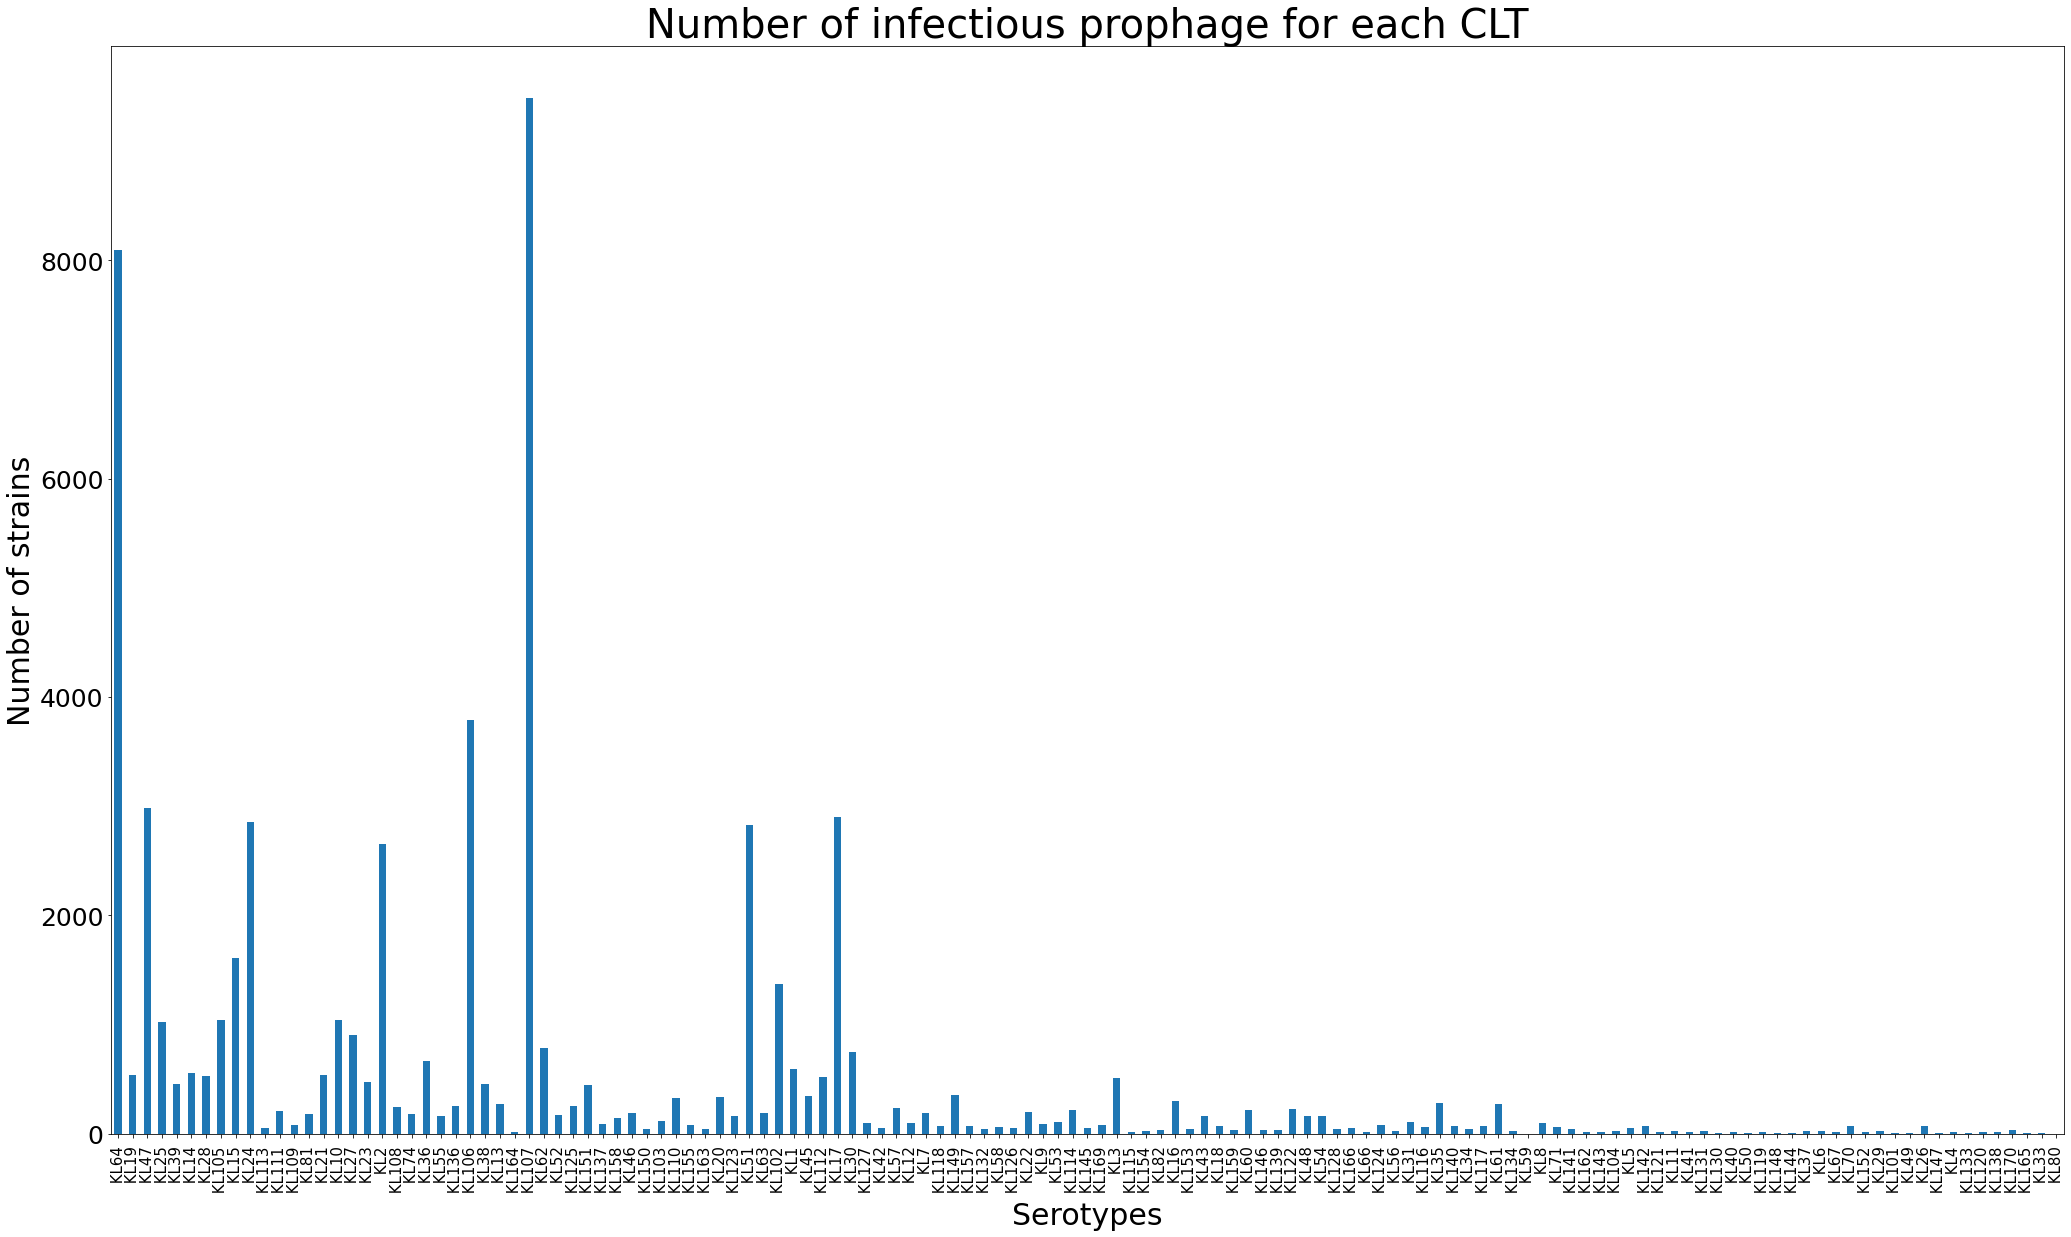

In [62]:
import matplotlib.pyplot as plt


clt_eff = pd.read_csv(f"{path_prophage}/CLT.effectif.phageboost_70.final.tsv", sep =",", names = ["CLT","effec"])

save_path=f"{path_prophage}/K_type_prophages.LCA.phageboost.png"
title_t="Number of infectious prophage for each CLT"
fig=clt_eff_0.plot(x='CLT', kind='bar', stacked=True, legend=False,figsize=(35,20))
plt.title(title_t,fontsize=40)
plt.xlabel('Serotypes',fontsize=30)
plt.ylabel('Number of strains',fontsize=30)
#plt.legend(fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 25)
fig.figure.savefig(save_path,dpi='figure',format='png')

In [15]:
# Plotting the informations :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0, index_col="K serotype")
info_r1=pd.read_csv(f"{path_R1}/results_R1_file.sharp.tsv", sep="\t",header=0)

save_path=f"{path_R1}/stacked_plot.strain_count.png"
title_t='Strains count for each K-serotypes in the Klebsiella Genus'
fig=info_r1[info_r1.columns.difference(["Prophage count Phispy","Total number strains"])].plot(x='K serotype', kind='bar', 
                                                                                               stacked=True, legend=False,figsize=(35,20))
plt.title(title_t,fontsize=20)
plt.xlabel('Serotypes',fontsize=20)
plt.ylabel('Number of strains',fontsize=20)
plt.legend(fontsize=20)

fig.figure.savefig(save_path,dpi='figure',format='png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/concha-eloko/Documents/I2sysbio/Bioinformatics/prediction_depolymerase_tropism/prediction_tropism_info-master/results_R1_file.sharp.tsv'